# 实现一个MINI神经网络框架

- 可用来实现全连接型神经网络、卷积神经网络
- 可使用层的类型：全连接层、卷积层、池化层
- 激活函数有：ReLU、sigmoid、softmax、tanh
- 内部优化有：Xavier初始化权重、momentum、RMSProp、Adam、Droupout
- 训练方法有：SGD、BGD

## 全连接型神经网络

### 鸢尾花数据测试

In [1]:
# 导入必备的包
import numpy as np
from nn.model import Sequence
from nn.layers import Dense
from nn.utils import Activation, Droupout

In [2]:
# 导入 iris 数据集
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

training_data = []

for i in range(X.shape[0]):
    _y = np.zeros((3,))
    _y[y[i]] = 1
    training_data.append((X[i,:], _y))

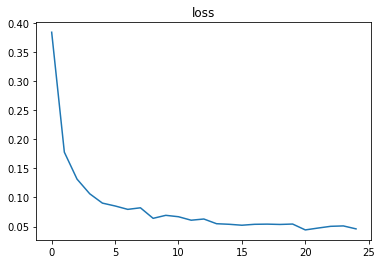

In [3]:
# 实例化 神经网络模型

iter_num = 25

learning_rate = 0.009

model = Sequence(training_data, (1, 4), 
                                    [Dense(32, learning_rate),
                                     Activation('tanh'),
                                     Dense(3, learning_rate),
                                     Activation('softmax')])

model.fit(iter_num, plot_loss=True)

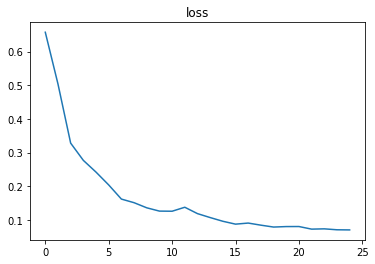

In [5]:
# 批梯度下降
learning_rate = 0.009

iter_num = 25

model = Sequence(training_data, (1, 4), 
                                    [Dense(32, learning_rate),
                                     Activation('tanh'),
                                     Dense(3, learning_rate),
                                     Activation('softmax')])

model.fit(iter_num, batch_size=16, plot_loss=True, mode='bgd')

## 卷积神经网络

### MNIST手写数字数据集

In [1]:
# 导入必备的包
import numpy as np
from nn.model import CNN
from nn.layers import Conv2DLayer, Pool2DLayer, Dense
from nn.utils import Flatten, Droupout, Activation

In [2]:
# 加载 MNIST数据集
from mnist_loader import load_data_wrapper
# 加载数据集、交叉验证集、测试集
training_data, validation_data, test_data = load_data_wrapper()

In [3]:
# 定义超参数

# 学习率
learning_rate = 1e-3
# 学习衰减率
decay_rate = 0.1
# 迭代次数
epoch = 5

cnn = CNN(training_data, input_dim=(28,28,1), \
          learning_rate=learning_rate, decay_rate=decay_rate, optimizer='adam')

cnn.add(Conv2DLayer(filternum=16, filtersize=(3,3)))
cnn.add(Activation('relu', leaky_rate=5.5))
cnn.add(Pool2DLayer(f=2, stride=1, mode='max'))

cnn.add(Flatten())

cnn.add(Dense(64))
cnn.add(Activation('relu', leaky_rate=5.5))

cnn.add(Dense(10))
cnn.add(Activation('softmax'))

In [4]:
cnn.fit(epoch, mode='sgd')

epoch 1/5:[##################################################]100.00% 	loss 0.407491	acc 0.901200
epoch 2/5:[##################################################]100.00% 	loss 0.000020	acc 0.953140
epoch 3/5:[##################################################]100.00% 	loss 0.000843	acc 0.960740
epoch 4/5:[##################################################]100.00% 	loss 0.000006	acc 0.963180
epoch 5/5:[##################################################]100.00% 	loss 0.000000	acc 0.964220


In [5]:
cnn.evaluate(validation_data)

Testing:[##################################################]100.00% 	acc : 0.952700


array([0.9527])

In [6]:
cnn.evaluate(test_data)

array([0.9405])

### Cifar数据集测试

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255.0
X_test /= 255.0
print('训练样例:', X_train.shape, Y_train.shape,', 测试样例:', X_test.shape, Y_test.shape)

训练样例: (50000, 32, 32, 3) (50000, 1) , 测试样例: (10000, 32, 32, 3) (10000, 1)


In [3]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
print(Y_train.shape)

(50000, 10)


In [4]:
training_data = [(X_train[i,:,:,:], Y_train[i,:]) for i in range(X_train.shape[0])]

In [5]:
import numpy as np
from nn.model import CNN
from nn.layers import Conv2DLayer, Pool2DLayer, Dense
from nn.utils import Flatten, Droupout, Activation, BatchNormalization

In [6]:
# 定义超参数

# 学习率
learning_rate = 0.01
# 学习衰减率
decay_rate = 1.
# 迭代次数
epoch = 1

cnn = CNN(training_data, input_dim=(32,32,3), \
          learning_rate=learning_rate, decay_rate=decay_rate, optimizer='adam')

cnn.add(Conv2DLayer(filternum=32, filtersize=(3,3)))
cnn.add(Activation('relu'))

cnn.add(Conv2DLayer(filternum=32, filtersize=(3,3)))
cnn.add(Activation('relu'))
cnn.add(Pool2DLayer(f=2, stride=1, mode='max'))
cnn.add(Droupout(0.25))

cnn.add(Conv2DLayer(filternum=64, filtersize=(3,3)))
cnn.add(Activation('relu'))

cnn.add(Conv2DLayer(filternum=64, filtersize=(3,3)))
cnn.add(Activation('relu'))
cnn.add(Pool2DLayer(f=2, stride=1, mode='average'))
cnn.add(Droupout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Droupout())

cnn.add(Dense(10))
cnn.add(Activation('softmax'))

In [7]:
cnn.fit(epoch, mode='sgd')

KeyboardInterrupt: 